<a href="https://www.kaggle.com/code/rajatraj0502/predict-students-dropout-academic-success?scriptVersionId=137671955" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-students-dropout-and-academic-success/dataset.csv


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/predict-students-dropout-and-academic-success/dataset.csv")

# Display the first few rows of the dataset
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Check the shape of the dataset
df.shape


(4424, 35)

In [4]:
# Check for missing values
df.isnull().sum()


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [5]:
# Get the summary statistics
df.describe()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
# Inspect the target variable
df['Target'].value_counts()


Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


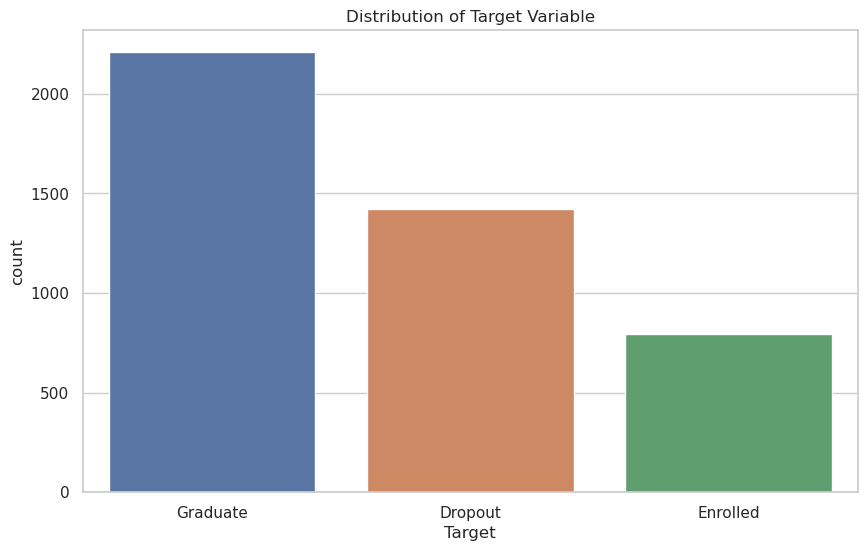

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Target', order=df['Target'].value_counts().index)
plt.title('Distribution of Target Variable')
plt.show()


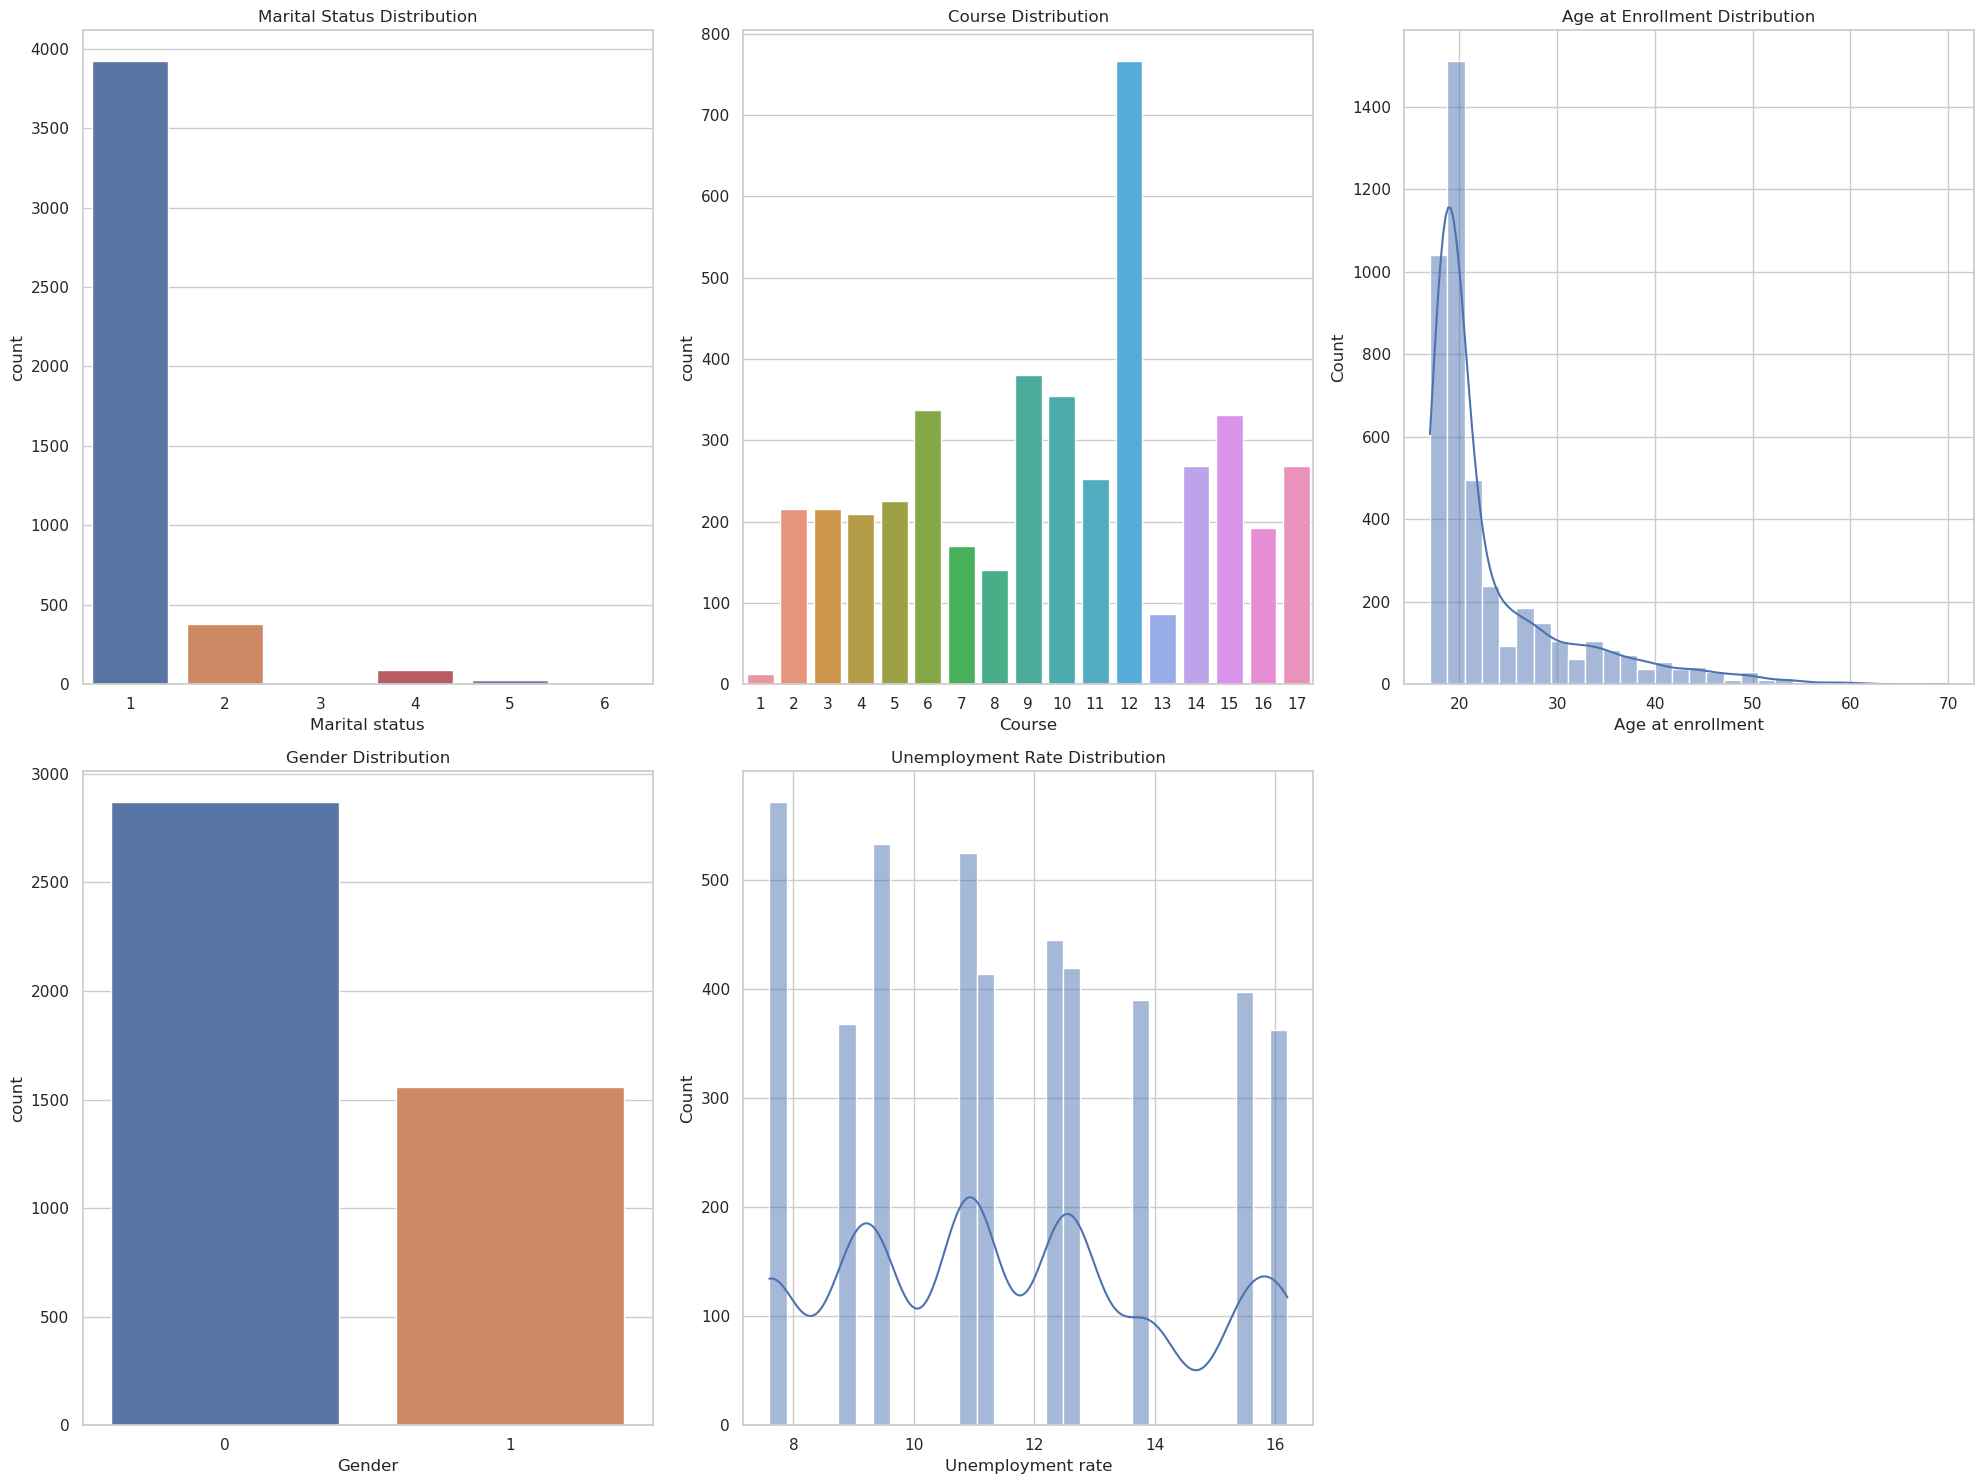

In [8]:
# Define the figure size
plt.figure(figsize=(20, 15))

# Marital status
plt.subplot(231)
sns.countplot(data=df, x='Marital status')
plt.title('Marital Status Distribution')

# Course
plt.subplot(232)
sns.countplot(data=df, x='Course')
plt.title('Course Distribution')

# Age at enrollment
plt.subplot(233)
sns.histplot(data=df, x='Age at enrollment', bins=30, kde=True)
plt.title('Age at Enrollment Distribution')

# Gender
plt.subplot(234)
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')

# Unemployment rate
plt.subplot(235)
sns.histplot(data=df, x='Unemployment rate', bins=30, kde=True)
plt.title('Unemployment Rate Distribution')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


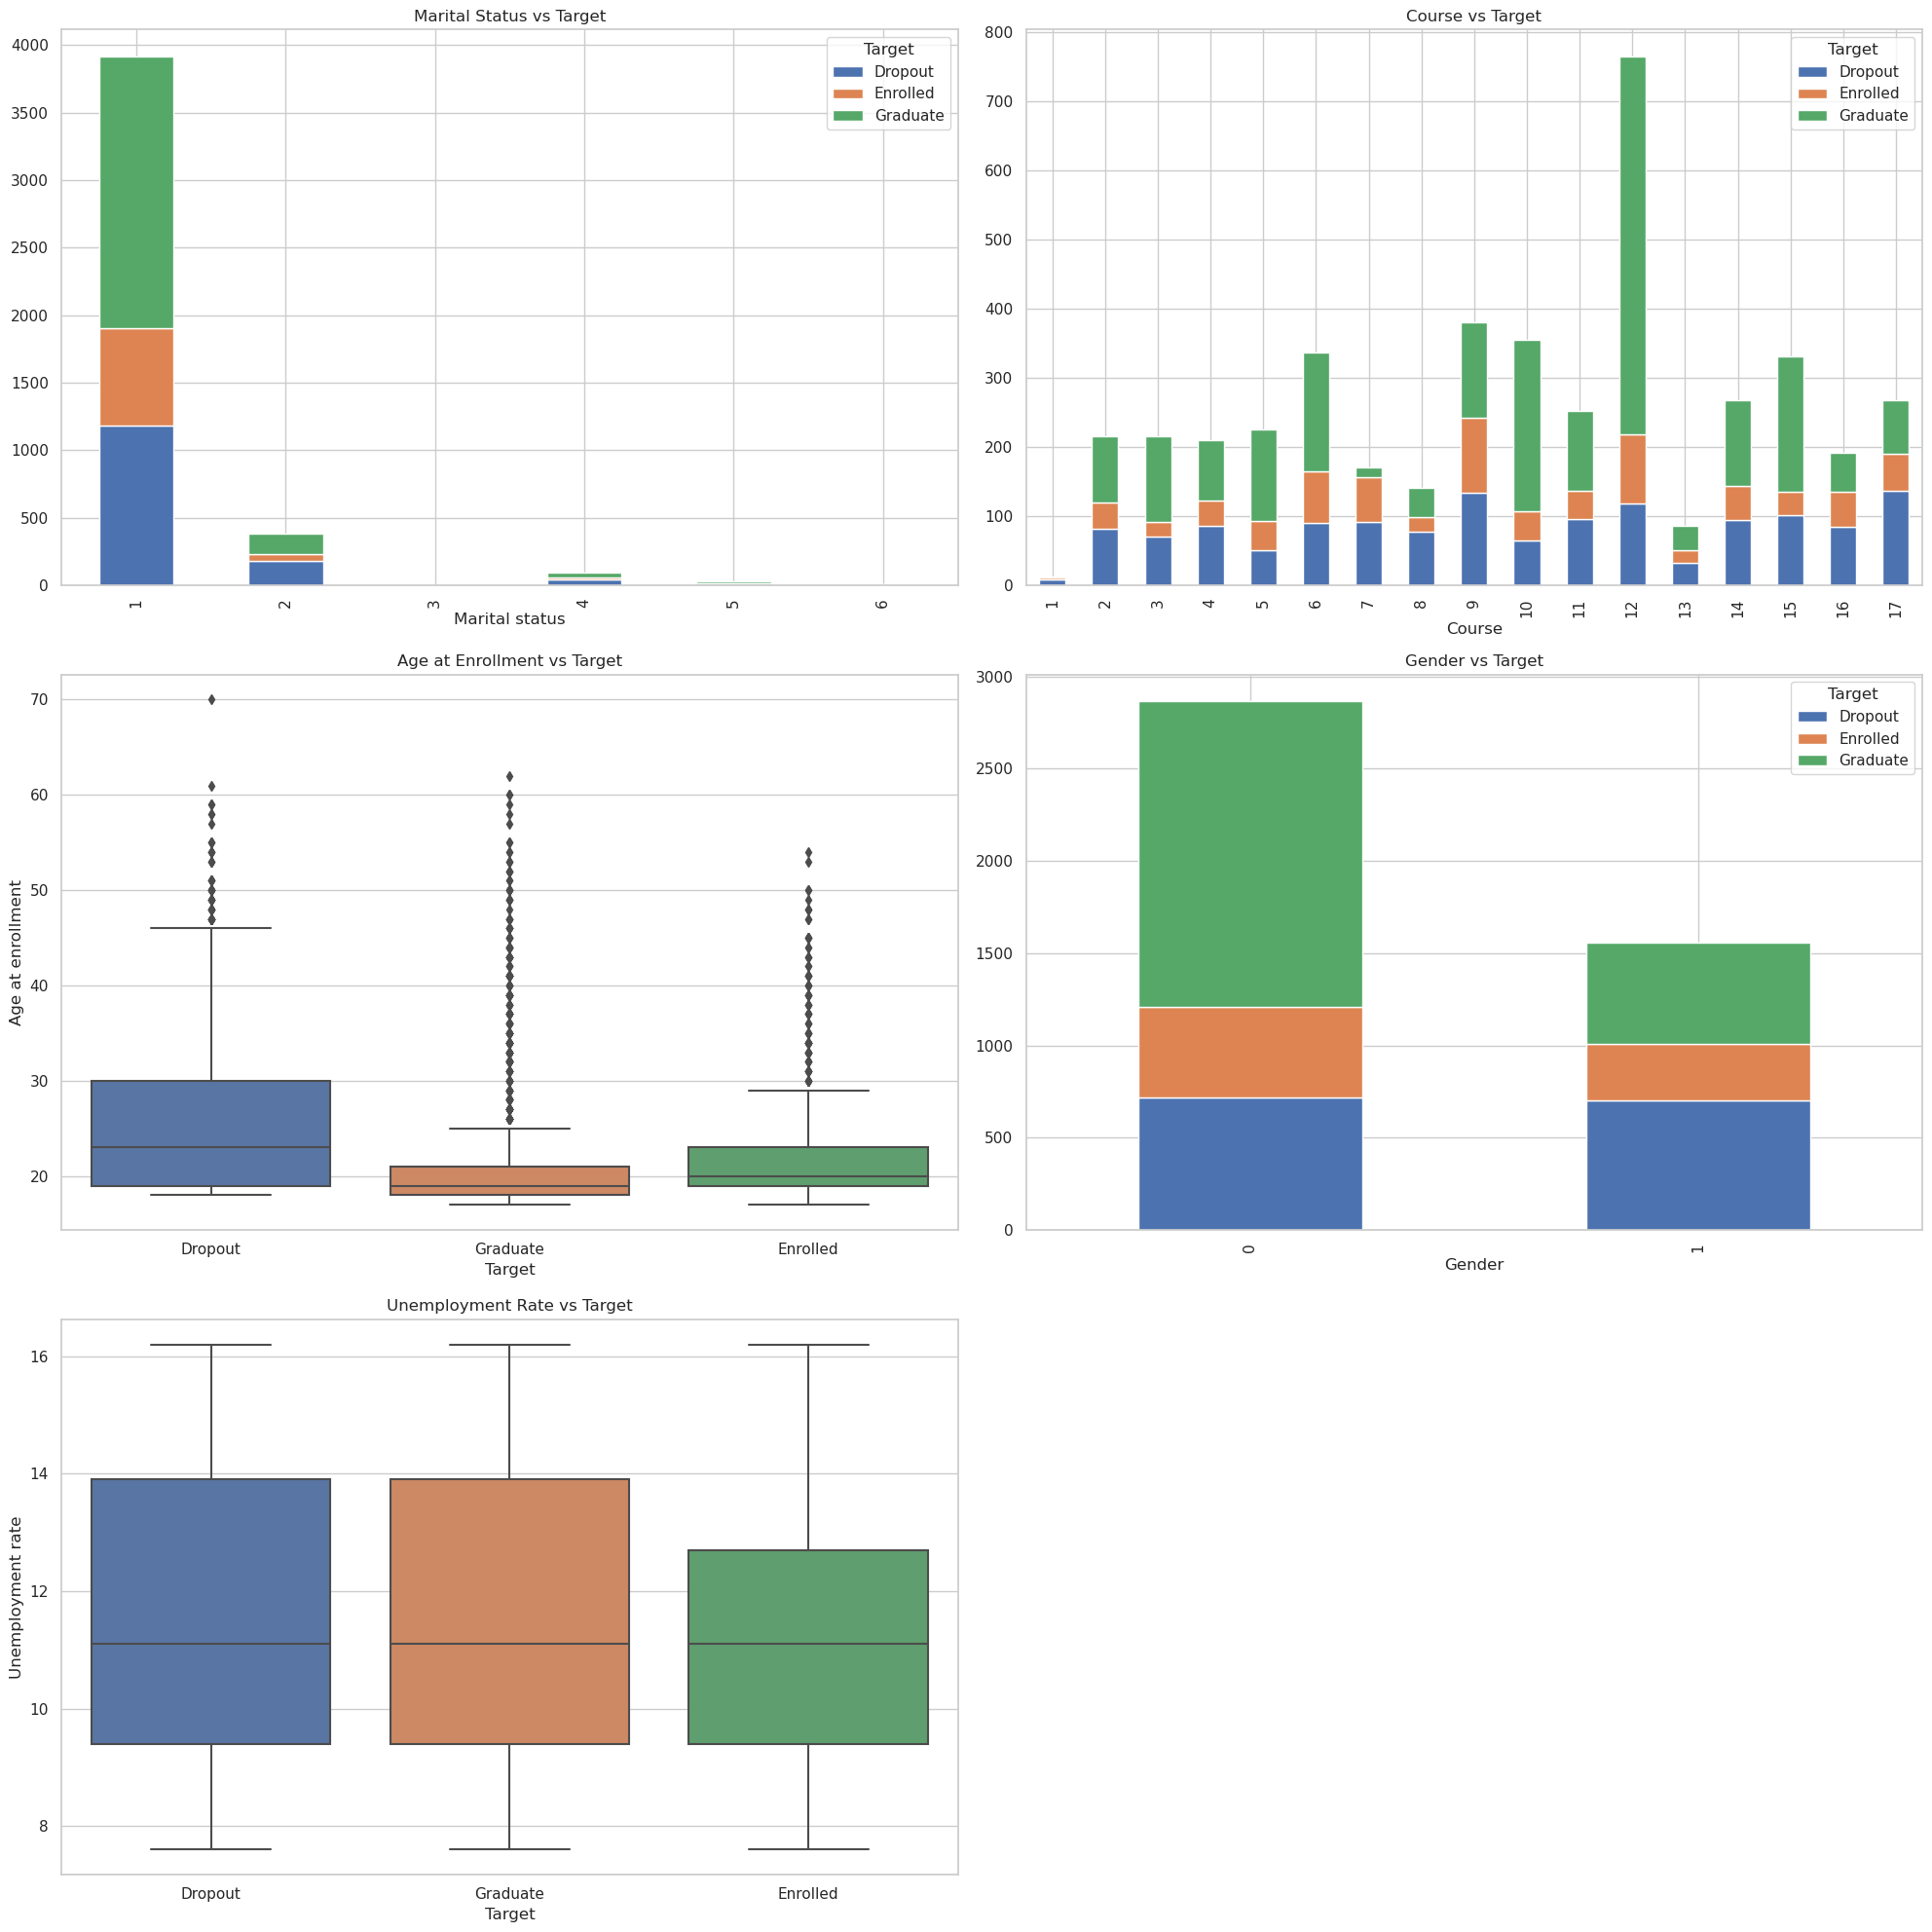

In [9]:
# Bivariate analysis

# Define the figure size
plt.figure(figsize=(20, 20))

# Marital status vs Target
plt.subplot(321)
df.groupby(['Marital status', 'Target']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Marital Status vs Target')

# Course vs Target
plt.subplot(322)
df.groupby(['Course', 'Target']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Course vs Target')

# Age at enrollment vs Target
plt.subplot(323)
sns.boxplot(data=df, x='Target', y='Age at enrollment')
plt.title('Age at Enrollment vs Target')

# Gender vs Target
plt.subplot(324)
df.groupby(['Gender', 'Target']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Gender vs Target')

# Unemployment rate vs Target
plt.subplot(325)
sns.boxplot(data=df, x='Target', y='Unemployment rate')
plt.title('Unemployment Rate vs Target')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


In [10]:
# Identify categorical and numerical columns
categorical_cols = [col for col in df.columns if df[col].nunique() <= 20 and col != 'Target']
numerical_cols = [col for col in df.columns if df[col].nunique() > 20 and col != 'Target']

categorical_cols, numerical_cols


(['Marital status',
  'Application mode',
  'Application order',
  'Course',
  'Daytime/evening attendance',
  'Previous qualification',
  'Displaced',
  'Educational special needs',
  'Debtor',
  'Tuition fees up to date',
  'Gender',
  'Scholarship holder',
  'International',
  'Curricular units 1st sem (without evaluations)',
  'Curricular units 2nd sem (credited)',
  'Curricular units 2nd sem (approved)',
  'Curricular units 2nd sem (without evaluations)',
  'Unemployment rate',
  'Inflation rate',
  'GDP'],
 ['Nacionality',
  "Mother's qualification",
  "Father's qualification",
  "Mother's occupation",
  "Father's occupation",
  'Age at enrollment',
  'Curricular units 1st sem (credited)',
  'Curricular units 1st sem (enrolled)',
  'Curricular units 1st sem (evaluations)',
  'Curricular units 1st sem (approved)',
  'Curricular units 1st sem (grade)',
  'Curricular units 2nd sem (enrolled)',
  'Curricular units 2nd sem (evaluations)',
  'Curricular units 2nd sem (grade)'])

In [11]:
# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the first few rows of the encoded dataset
df_encoded.head()


,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),...,GDP_-4.06,GDP_-3.12,GDP_-1.7,GDP_-0.92,GDP_0.32,GDP_0.79,GDP_1.74,GDP_1.79,GDP_2.02,GDP_3.51
0,1,13,10,6,10,20,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,3,4,4,19,0,6,6,6,...,0,0,0,0,0,1,0,0,0,0
2,1,22,27,10,10,19,0,6,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,23,27,6,4,20,0,6,8,6,...,0,1,0,0,0,0,0,0,0,0
4,1,22,28,10,10,45,0,6,9,5,...,0,0,0,0,0,1,0,0,0,0


In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the scaled dataset
df_encoded.head()


,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),...,GDP_-4.06,GDP_-3.12,GDP_-1.7,GDP_-0.92,GDP_0.32,GDP_0.79,GDP_1.74,GDP_1.79,GDP_2.02,GDP_3.51
0,-0.145586,0.075111,-0.584526,-0.329669,0.449087,-0.430363,-0.300813,-2.528560,-1.986068,-1.521257,...,0,0,0,0,0,0,1,0,0,0
1,-0.145586,-1.254495,-1.218380,-0.829997,-0.786461,-0.562168,-0.300813,-0.109105,-0.550192,0.418050,...,0,0,0,0,0,1,0,0,0,0
2,-0.145586,1.072315,0.954834,0.670987,0.449087,-0.562168,-0.300813,-0.109105,-1.986068,-1.521257,...,0,0,0,0,0,0,1,0,0,0
3,-0.145586,1.183116,0.954834,-0.329669,-0.786461,-0.430363,-0.300813,-0.109105,-0.071567,0.418050,...,0,1,0,0,0,0,0,0,0,0
4,-0.145586,1.072315,1.045384,0.670987,0.449087,2.864765,-0.300813,-0.109105,0.167746,0.094832,...,0,0,0,0,0,1,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the shape of the training and test sets
X_train.shape, X_test.shape


((3096, 185), (1328, 185))

In [14]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the target classes in the training set after SMOTE
y_train_smote.value_counts()


Graduate    1546
Dropout     1546
Enrolled    1546
Name: Target, dtype: int64

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.7673192771084337

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None]
}

# Initialize a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'max_depth': 20, 'n_estimators': 100}, 0.7700258397932817)

In [17]:
# Predict on the test set with the best model
y_pred_best = grid_search.predict(X_test)

# Calculate the accuracy of the best model
accuracy_best = accuracy_score(y_test, y_pred_best)

accuracy_best


0.7725903614457831

In [18]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Calculate precision, recall, and F1 score
classification_metrics = classification_report(y_test, y_pred_best, output_dict=True)

# We need to binarize the labels for the multiclass AUC-ROC
lb = LabelBinarizer()
lb.fit(y_test)
y_test_lb = lb.transform(y_test)
y_pred_lb = lb.transform(y_pred_best)

# Calculate multiclass AUC-ROC
roc_auc_multiclass = roc_auc_score(y_test_lb, y_pred_lb, multi_class='ovr')

classification_metrics, roc_auc_multiclass


({'Dropout': {'precision': 0.806615776081425,
   'recall': 0.7423887587822015,
   'f1-score': 0.7731707317073172,
   'support': 427},
  'Enrolled': {'precision': 0.5912408759124088,
   'recall': 0.3403361344537815,
   'f1-score': 0.432,
   'support': 238},
  'Graduate': {'precision': 0.7869674185463659,
   'recall': 0.947209653092006,
   'f1-score': 0.8596851471594797,
   'support': 663},
  'accuracy': 0.7725903614457831,
  'macro avg': {'precision': 0.7282746901800666,
   'recall': 0.6766448487759963,
   'f1-score': 0.6882852929555989,
   'support': 1328},
  'weighted avg': {'precision': 0.7582075778239175,
   'recall': 0.7725903614457831,
   'f1-score': 0.7552192432272286,
   'support': 1328}},
 0.7730947633956656)

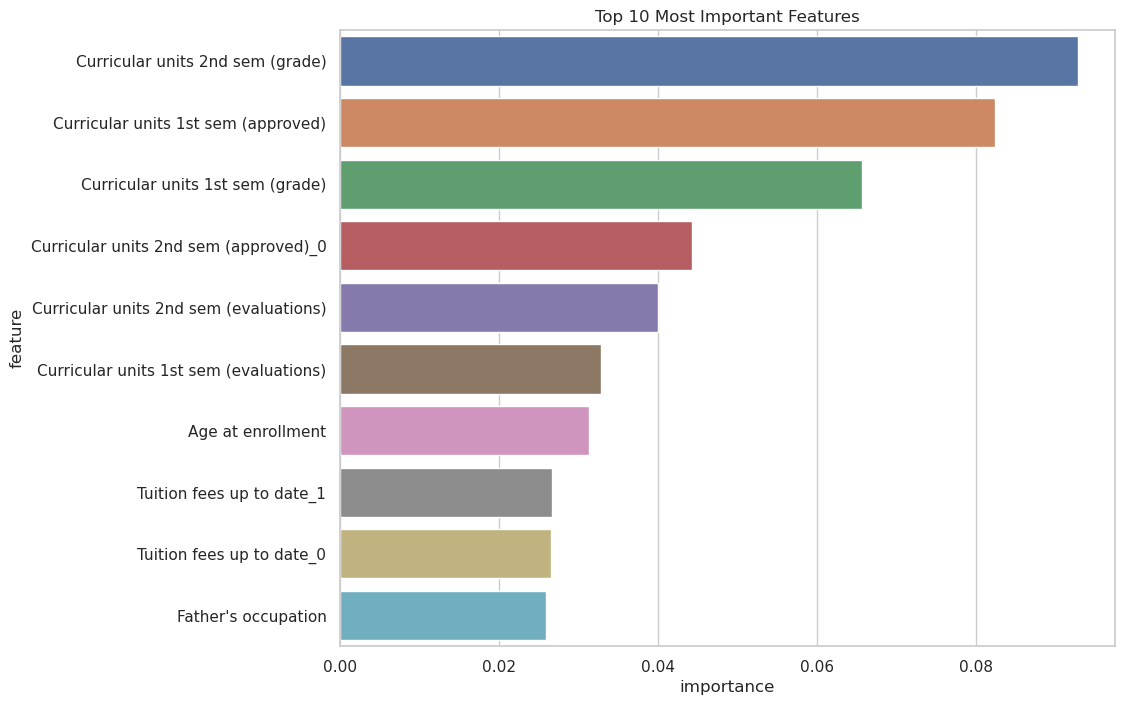

In [19]:
# Get feature importances
importances = grid_search.best_estimator_.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({"feature": X_train.columns, "importance": importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values("importance", ascending=False)

# Display the top 10 most important features
feature_importances_top10 = feature_importances.head(10)

# Plot the top 10 most important features
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances_top10, x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()


In [20]:
# Select a random student from the dataset
student = df.sample(1, random_state=42)

# Display the student's data
student


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1255,4,12,1,8,1,1,1,3,1,6,...,0,6,16,1,10.0,0,11.1,0.6,2.02,Dropout


In [21]:
# One-hot encode the categorical variables
student_encoded = pd.get_dummies(student, columns=categorical_cols)

# Add missing columns with 0s (since the student data might not have all the columns after one-hot encoding)
missing_cols = set(df_encoded.columns) - set(student_encoded.columns)
for col in missing_cols:
    student_encoded[col] = 0

# Reorder the columns to match the original dataset
student_encoded = student_encoded[df_encoded.columns]

# Scale the numerical variables
student_encoded[numerical_cols] = scaler.transform(student_encoded[numerical_cols])

# Separate the features and the target
student_features = student_encoded.drop('Target', axis=1)
student_target = student_encoded['Target']

# Display the preprocessed student data
student_features, student_target


/tmp/ipykernel_20/1858925555.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  student_encoded[col] = 0
/tmp/ipykernel_20/1858925555.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  student_encoded[col] = 0
/tmp/ipykernel_20/1858925555.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  student_

(      Nacionality  Mother's qualification  Father's qualification  \
 1255    -0.145586               -1.032894               -1.399481   
 
       Mother's occupation  Father's occupation  Age at enrollment  \
 1255            -0.329669            -0.374612           0.887688   
 
       Curricular units 1st sem (credited)  \
 1255                            -0.300813   
 
       Curricular units 1st sem (enrolled)  \
 1255                            -0.109105   
 
       Curricular units 1st sem (evaluations)  \
 1255                               -0.310879   
 
       Curricular units 1st sem (approved)  ...  GDP_-4.06  GDP_-3.12  \
 1255                            -1.521257  ...          0          0   
 
       GDP_-1.7  GDP_-0.92  GDP_0.32  GDP_0.79  GDP_1.74  GDP_1.79  GDP_2.02  \
 1255         0          0         0         0         0         0         1   
 
       GDP_3.51  
 1255         0  
 
 [1 rows x 185 columns],
 1255    Dropout
 Name: Target, dtype: object)

In [22]:
# Predict the student's outcome
student_pred = grid_search.predict(student_features)

student_pred


array(['Dropout'], dtype=object)